<a href="https://colab.research.google.com/github/Guilherme-IF/Popularidade-Spotify/blob/main/Respostas_Projeto_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()


Saving Spotify-2000.csv to Spotify-2000.csv


In [4]:
# Bibliotecas essenciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style="whitegrid")

# Carregar o dataset
df = pd.read_csv('Spotify-2000.csv')

# Visualizar as 5 primeiras linhas (opcional)
df.head()


,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


Quais são os cinco artistas mais frequentes no Top 2000?

In [5]:
# Frequência absoluta
artist_counts = df['Artist'].value_counts()

# Frequência relativa (%)
total_songs = len(df)
artist_relative = (artist_counts / total_songs) * 100

# Top 5 artistas
top_5_artists = artist_counts.head(5)
top_5_relative = artist_relative.head(5)

# Exibir resultados
print("🎤 Top 5 Artistas - Frequência Absoluta:")
print(top_5_artists)

print("\n🎵 Top 5 Artistas - Frequência Relativa (%):")
print(top_5_relative.round(2))


🎤 Top 5 Artistas - Frequência Absoluta:
Artist
Queen                 37
The Beatles           36
Coldplay              27
U2                    26
The Rolling Stones    24
Name: count, dtype: int64

🎵 Top 5 Artistas - Frequência Relativa (%):
Artist
Queen                 1.86
The Beatles           1.81
Coldplay              1.35
U2                    1.30
The Rolling Stones    1.20
Name: count, dtype: float64


Qual é a distribuição da popularidade das músicas?

📊 Estatísticas da Popularidade:
count    1994.00000
mean       59.52658
std        14.35160
min        11.00000
25%        49.25000
50%        62.00000
75%        71.00000
max       100.00000
Name: Popularity, dtype: float64


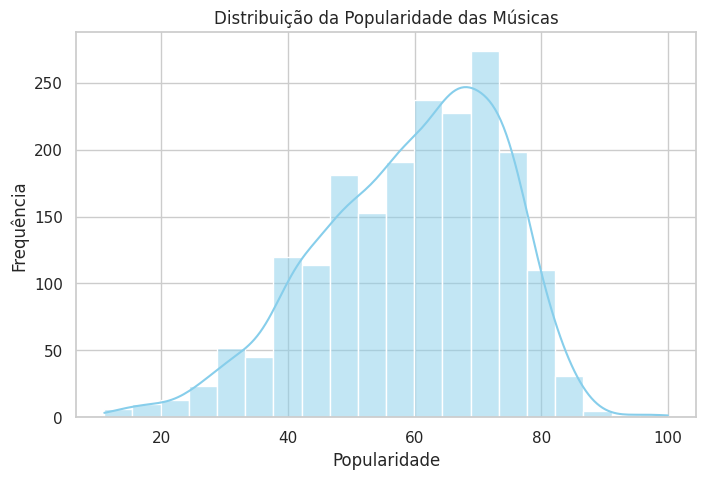

In [6]:
# Estatísticas
pop_stats = df['Popularity'].describe()
print("📊 Estatísticas da Popularidade:")
print(pop_stats)

# Histograma
plt.figure(figsize=(8,5))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')
plt.title('Distribuição da Popularidade das Músicas')
plt.xlabel('Popularidade')
plt.ylabel('Frequência')
plt.show()


Como variam os valores de energia (energy) entre as músicas?

⚡ Estatísticas de Energia:
count    1994.000000
mean       59.679539
std        22.154322
min         3.000000
25%        42.000000
50%        61.000000
75%        78.000000
max       100.000000
Name: Energy, dtype: float64


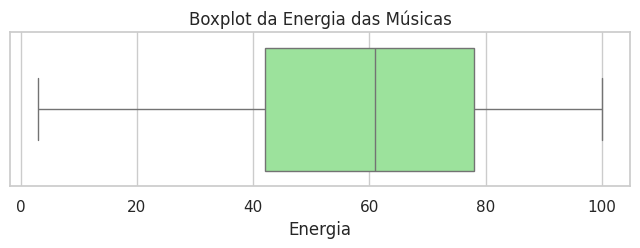

In [7]:
# Estatísticas de energia
energy_stats = df['Energy'].describe()
print("⚡ Estatísticas de Energia:")
print(energy_stats)

# Boxplot
plt.figure(figsize=(8,2))
sns.boxplot(x=df['Energy'], color='lightgreen')
plt.title('Boxplot da Energia das Músicas')
plt.xlabel('Energia')
plt.show()


Quais são os cinco gêneros musicais mais comuns no Top 2000?

In [8]:
# Frequência absoluta e relativa
genre_counts = df['Top Genre'].value_counts()
genre_relative = (genre_counts / total_songs) * 100

# Top 5 gêneros
top_5_genres = genre_counts.head(5)
top_5_genres_relative = genre_relative.head(5)

# Exibir resultados
print("🎧 Top 5 Gêneros - Frequência Absoluta:")
print(top_5_genres)

print("\n🎼 Top 5 Gêneros - Frequência Relativa (%):")
print(top_5_genres_relative.round(2))


🎧 Top 5 Gêneros - Frequência Absoluta:
Top Genre
album rock          413
adult standards     123
dutch pop            88
alternative rock     86
dance pop            83
Name: count, dtype: int64

🎼 Top 5 Gêneros - Frequência Relativa (%):
Top Genre
album rock          20.71
adult standards      6.17
dutch pop            4.41
alternative rock     4.31
dance pop            4.16
Name: count, dtype: float64


Qual é a distribuição da duração das músicas?

Medidas da duração (em minutos):
Média: 4.34
Mediana: 4.08
Desvio padrão: 1.35
Mínimo: 1.55
Máximo: 16.10


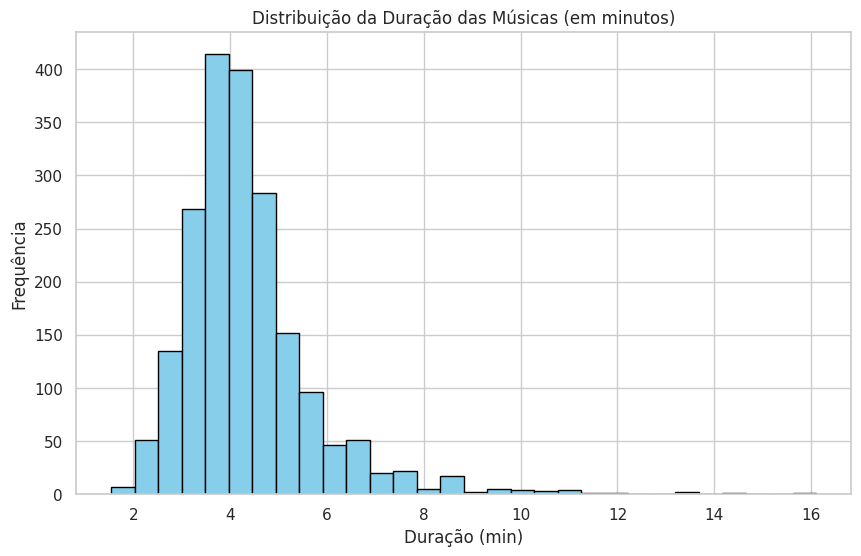

Medidas da duração (em minutos):
Média: 4.34
Mediana: 4.08
Desvio padrão: 1.35
Mínimo: 1.55
Máximo: 16.10


In [18]:
# Substitua 'Length (Duration)' pelo nome exato se aparecer diferente no print(df.columns)
# Substitua 'Length (Duration)' pelo nome exato se aparecer diferente no print(df.columns)

# Convert the 'Length (Duration)' column to numeric, coercing errors to NaN
df['Length (Duration)'] = pd.to_numeric(df['Length (Duration)'], errors='coerce')

# Now perform the division, handling potential NaN values
df['duration_min'] = df['Length (Duration)'] / 60

# Remove rows with NaN in 'duration_min' if necessary for calculations
# df.dropna(subset=['duration_min'], inplace=True) # Uncomment if you want to drop rows with errors

# Estatísticas
duracao = df['duration_min']
print("Medidas da duração (em minutos):")
# Check if there are any non-NaN values before calculating statistics
if not duracao.dropna().empty:
    print(f"Média: {duracao.mean():.2f}")
    print(f"Mediana: {duracao.median():.2f}")
    print(f"Desvio padrão: {duracao.std():.2f}")
    print(f"Mínimo: {duracao.min():.2f}")
    print(f"Máximo: {duracao.max():.2f}")
else:
    print("Não foi possível calcular as estatísticas de duração devido a dados inválidos.")

# Histograma
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Filter out NaN values before plotting
plt.hist(duracao.dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição da Duração das Músicas (em minutos)')
plt.xlabel('Duração (min)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()
df['duration_min'] = df['Length (Duration)'] / 60

# Remove rows with NaN in 'duration_min' if necessary for calculations
# df.dropna(subset=['duration_min'], inplace=True) # Uncomment if you want to drop rows with errors

# Estatísticas
duracao = df['duration_min']
print("Medidas da duração (em minutos):")
# Check if there are any non-NaN values before calculating statistics
if not duracao.dropna().empty:
    print(f"Média: {duracao.mean():.2f}")
    print(f"Mediana: {duracao.median():.2f}")
    print(f"Desvio padrão: {duracao.std():.2f}")
    print(f"Mínimo: {duracao.min():.2f}")
    print(f"Máximo: {duracao.max():.2f}")
else:
    print("Não foi possível calcular as estatísticas de duração devido a dados inválidos.")

Como se distribuem os valores de dançabilidade (danceability) das músicas?


Estatísticas da Danceability:
Média: 53.238
Mediana: 53.000
Desvio padrão: 15.352
Mínimo: 10.000
Máximo: 96.000


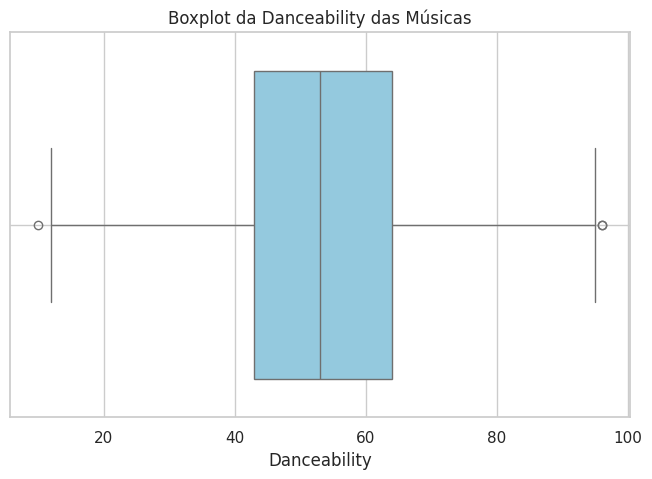

In [21]:
# Print the column names to find the correct one
# print(df.columns) # This line is helpful for debugging, but can be commented out once the correct column name is identified

# After identifying the correct column name, replace 'CorrectColumnName' with the actual name.
# Assuming the column is named 'Danceability' based on common Spotify datasets.
correct_column_name = 'Danceability' # Store the correct column name in a variable for clarity

# Converter a coluna de danceability para numérico
df[correct_column_name] = pd.to_numeric(df[correct_column_name], errors='coerce')

# Remover valores nulos temporariamente para análise
dance = df[correct_column_name].dropna()

# Estatísticas descritivas
print(f"\nEstatísticas da {correct_column_name}:")
print(f"Média: {dance.mean():.3f}")
print(f"Mediana: {dance.median():.3f}")
print(f"Desvio padrão: {dance.std():.3f}")
print(f"Mínimo: {dance.min():.3f}")
print(f"Máximo: {dance.max():.3f}")

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=dance, color='skyblue')
plt.title(f'Boxplot da {correct_column_name} das Músicas')
plt.xlabel(correct_column_name)
plt.grid(True)
plt.show()
